In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import akshare as ak
matplotlib.rc("font", family="PingFang HK")

from datetime import date, timedelta

#### 指数溢价率

In [2]:
HS300_dividend_ratio = pd.read_csv('沪深300_股息率_市值加权_10年_20220126_090402.csv')[['时间','股息率市值加权']].dropna().set_index('时间')[::-1]
Bond10return = pd.read_csv('宏观_中债_收益率_20220126_032810.csv').dropna().set_index('时间')[::-1]

HS300_dividend_ratio.index = pd.to_datetime(HS300_dividend_ratio.index)
Bond10return.index = pd.to_datetime(Bond10return.index)



dividend_premium_rate_df = HS300_dividend_ratio.join(Bond10return)
dividend_premium_rate_df['沪深300股息溢价'] = dividend_premium_rate_df['股息率市值加权'] - dividend_premium_rate_df['十年期收益率']
# dividend_premium_rate_df=dividend_premium_rate_df.reset_index()
dividend_premium_rate_df

,股息率市值加权,一年期收益率,三年期收益率,五年期收益率,十年期收益率,沪深300股息溢价
时间,,,,,,
2012-01-30,0.0238,0.027757,0.028858,0.030561,0.034005,-0.010205
2012-01-31,0.0237,0.027658,0.028893,0.030502,0.034064,-0.010364
2012-02-01,0.0240,0.027829,0.029075,0.031131,0.034318,-0.010318
2012-02-02,0.0235,0.027733,0.029059,0.031073,0.034410,-0.010910
2012-02-03,0.0234,0.027803,0.029058,0.031113,0.034360,-0.010960
...,...,...,...,...,...,...
2022-01-20,0.0215,0.020204,0.023038,0.024745,0.027271,-0.005771
2022-01-21,0.0217,0.020018,0.022614,0.024295,0.027100,-0.005400
2022-01-24,0.0216,0.019502,0.022188,0.023527,0.026751,-0.005151


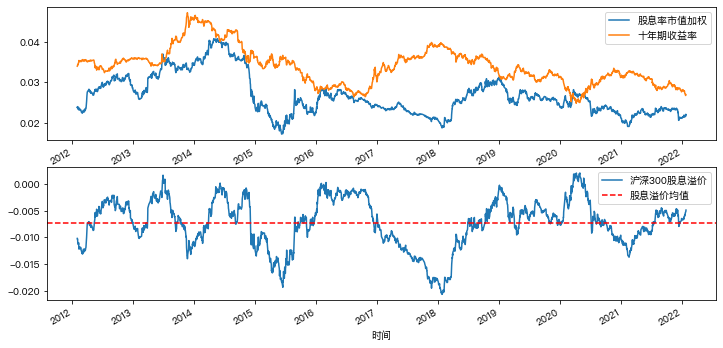

In [3]:
fig = plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
dividend_premium_rate_df['股息率市值加权'].plot()
dividend_premium_rate_df['十年期收益率'].plot()
plt.legend()
plt.subplot(2,1,2)
dividend_premium_rate_df['沪深300股息溢价'].plot()
plt.axhline(y=dividend_premium_rate_df['沪深300股息溢价'].mean(), color='r', linestyle='--', label='股息溢价均值')
plt.legend()

In [13]:
HS300_index = ak.stock_zh_index_daily(symbol="sh000300")[['close', 'volume']]
ZZ500_index = ak.stock_zh_index_daily(symbol="sh000905")[['close', 'volume']]
ZZ1000_index = ak.stock_zh_index_daily(symbol="sh000852")[['close', 'volume']]

HS300_index.rename(columns={'close':'沪深300指数'}, inplace=True)
ZZ500_index.rename(columns={'close':'中证500指数'}, inplace=True)
ZZ1000_index.rename(columns={'close':'中证1000指数'}, inplace=True)

In [18]:
comp_df = HS300_index.join(ZZ500_index['中证500指数']).join(ZZ1000_index['中证1000指数']).dropna()
comp_df['中证500/沪深300'] = comp_df['中证500指数']/comp_df['沪深300指数']
comp_df['中证1000/沪深300'] = comp_df['中证1000指数']/comp_df['沪深300指数']

comp_df

,沪深300指数,volume,中证500指数,中证1000指数,中证500/沪深300,中证1000/沪深300
date,,,,,,
2014-10-17 00:00:00+00:00,2441.732,1.327600e+10,4860.732,6058.668,1.990690,2.481299
2014-10-20 00:00:00+00:00,2454.711,9.143540e+09,4929.160,6154.520,2.008041,2.507228
2014-10-21 00:00:00+00:00,2433.391,9.624191e+09,4884.024,6103.008,2.007086,2.508026
2014-10-22 00:00:00+00:00,2418.641,8.865619e+09,4825.609,6027.510,1.995174,2.492106
2014-10-23 00:00:00+00:00,2395.936,1.034918e+10,4755.231,5930.483,1.984707,2.475226
...,...,...,...,...,...,...
2022-01-20 00:00:00+00:00,4823.509,1.649713e+10,7056.785,7492.610,1.462998,1.553353
2022-01-21 00:00:00+00:00,4779.314,1.389526e+10,6976.616,7388.744,1.459753,1.545984
2022-01-24 00:00:00+00:00,4786.738,1.144639e+10,6979.246,7425.402,1.458038,1.551245


Text(0.5, 1.0, '指数风格')

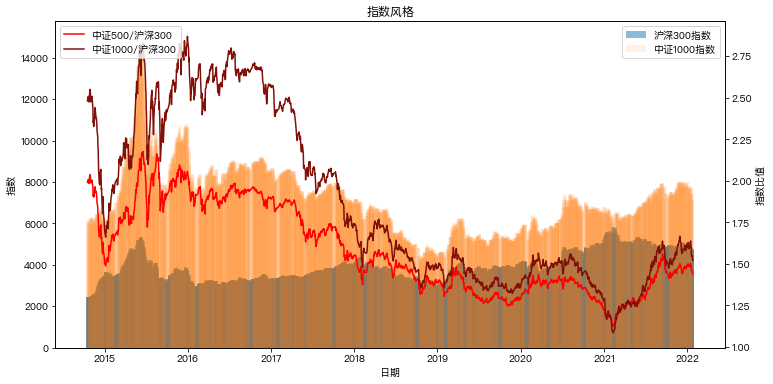

In [29]:
fig,ax = plt.subplots(figsize=(12,6))
ax.bar(comp_df.index, comp_df['沪深300指数'], width=15, label='沪深300指数', alpha=0.5)
ax.bar(comp_df.index, comp_df['中证1000指数'], width=15, label='中证1000指数', alpha=0.1)
ax.set_xlabel('日期')
ax.set_ylabel('指数')
ax.legend()
ax2 = ax.twinx()
ax2.plot(comp_df.index, comp_df['中证500/沪深300'], color='r', label='中证500/沪深300')
ax2.plot(comp_df.index, comp_df['中证1000/沪深300'], color='#821008', label='中证1000/沪深300')
ax2.set_ylabel('指数比值')
ax2.legend(loc=2)
ax.set_title('指数风格')

In [32]:
growth_index = ak.stock_zh_index_daily(symbol="sz399372")[['close', 'volume']]
value_index = ak.stock_zh_index_daily(symbol="sz399373")[['close', 'volume']]

growth_index.rename(columns={'close':'大盘成长'}, inplace=True)
value_index.rename(columns={'close':'大盘价值'}, inplace=True)

groth_value_df = growth_index.join(value_index['大盘价值'])
groth_value_df['大盘成长/大盘价值'] = groth_value_df['大盘成长']/groth_value_df['大盘价值']

groth_value_df

,大盘成长,volume,大盘价值,大盘成长/大盘价值
date,,,,
2010-01-07 00:00:00+00:00,3687.372,2.117033e+09,4673.646,0.788971
2010-01-08 00:00:00+00:00,3692.888,1.620831e+09,4683.236,0.788533
2010-01-11 00:00:00+00:00,3689.221,2.877134e+09,4677.926,0.788645
2010-01-12 00:00:00+00:00,3732.266,2.793942e+09,4735.098,0.788213
2010-01-13 00:00:00+00:00,3586.608,3.345498e+09,4531.597,0.791467
...,...,...,...,...
2022-01-20 00:00:00+00:00,6297.522,1.724396e+09,7796.937,0.807692
2022-01-21 00:00:00+00:00,6237.174,1.721524e+09,7726.985,0.807194
2022-01-24 00:00:00+00:00,6250.446,1.471822e+09,7730.832,0.808509


Text(0.5, 1.0, '指数风格')

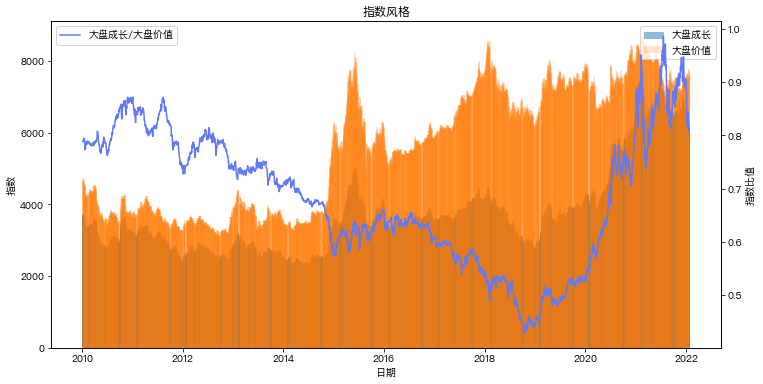

In [39]:
fig,ax = plt.subplots(figsize=(12,6))
ax.bar(groth_value_df.index, groth_value_df['大盘成长'], width=15, label='大盘成长', alpha=0.5)
ax.bar(groth_value_df.index, groth_value_df['大盘价值'], width=15, label='大盘价值', alpha=0.2)
ax.set_xlabel('日期')
ax.set_ylabel('指数')
ax.legend(loc=1)
ax2 = ax.twinx()
ax2.plot(groth_value_df.index, groth_value_df['大盘成长/大盘价值'], color='#627af5', label='大盘成长/大盘价值')
ax2.set_ylabel('指数比值')
ax2.legend(loc=2)
ax.set_title('指数风格')